#REAL ESTATE ARBITRAGE

The main objective of Real Estate Arbitrage is buying a house in a low price, sell in a higher price and short period of time.
Therefore it is reasonable to know the main variables that have a high influence on price.

Why?

Because theses main variables will alow you to notice whether the building is undervalued or not.

In this project, we will select the houses undervalued based on five or more key variables. For that, we need to make a good EDA(Exploratory Data Analysis) to see how the depedent variable (price) behave, how these variables have influence on price and whether the others variables are correlated with each other.

After the EDA, all transformations and adjusts that would be suitable on the data will be made. And, finally, we will make a Multiple Linear Regression with the selected variables as independent variable and the houses price as dependent variable.The Multiple Linear Regression will be evaluated through R2-score, statistical test and others metrics to see how good is our model to explain the depedent variable.

We will use a specific critria to consider a house as undervalued. The houses will be considered as undervalued if the difference between its predicted price (the price estimated for the model) and real price is higher than the RMSE (Root Mean Square Error). I have to say that this criteria is a little arbitrary, but I think it is valid.


We also need to know how much would be the profit if a real estate company, for example, wanted to buy some or all of the undervalued houses 

## Column Definitions

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living 
space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

##Data Wrangling

Here, we will clean the data mess. This part must be done carefully, because a minor error here and everything you will do later will lead you a giant misjudgments.

In [ ]:
#Importing the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Defining the main dataset
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Search for missing values is a fundamental task principally for Machine Learning modelling. It will be used linear regression model for our analysis.

In [ ]:
#Looking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Droping the ID
df.drop('id',inplace=True,axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#Looking the data columns type
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The date type is an "object", but its type should be a "datetime". We will change that

In [ ]:
#Converting the type of date column to datetime
df['date'] = pd.to_datetime(df['date'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Feature Engineering

May the season of the year affect the houses price? 

Well, we will verify that on EDA. But, first we need to create the season variable

In [ ]:
#Importing the datetime object from the datetime library
from datetime import datetime

In [ ]:
#Looking for the maximum and the minimum in the date
print(f'Minimum date: {min(df.date)}')
print(f'Maximum date: {max(df.date)}')

Minimum date: 2014-05-02 00:00:00
Maximum date: 2015-05-27 00:00:00


In [ ]:
#Getting the the index of each house for season that it was sold
ind_spring = df[(df['date']<datetime(2014,6,21))|(df['date']>=datetime(2015,3,20))].index
ind_summer = df[(datetime(2014,6,21)<=df['date']) & (df['date']<datetime(2014,9,22))].index
ind_autumn = df[(datetime(2014,9,22)<=df['date']) & (df['date']<datetime(2014,12,21))].index
ind_winter = df[(datetime(2014,12,21)<=df['date']) & (df['date']<datetime(2015,3,20))].index

In [ ]:
#Creating the season variable
seasons = {'spring':ind_spring,'summer':ind_summer,'autumn':ind_autumn,'winter':ind_winter}
for season in seasons:
  df.loc[seasons[season],'season'] = season
df.head(6)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,autumn
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,autumn
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,autumn
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,winter
5,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,spring


##EDA

Now, we are going to investigate futher the data, find relationships among the variables, formulate and test hypothesis. Everything based on graphs and statistical properties.

### Univariate Analysis

In [ ]:
#Showing some statistics metrics of each numeric variable
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


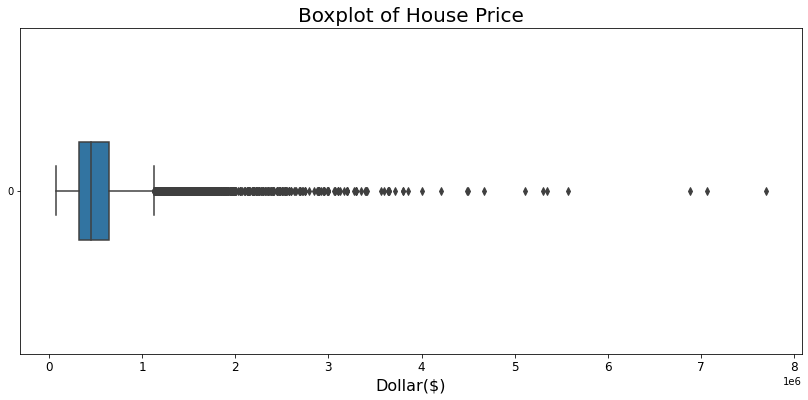

In [ ]:
#Plotting the Price boxplot
ax=sns.boxplot(data=df['price'],orient='h',width=0.3)
ax.figure.set_size_inches(14, 6)
ax.set_title('Boxplot of House Price', fontsize=20)
ax.set_xlabel('Dollar($)', fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax

There are a lot of outliers as you can see, but what should we do about them?

Well, it's normal the houses price has many outliers, because always there will be some houses that are so expensive as compared with the majority. Therefore we shouldn't do anything about these outliers right now

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


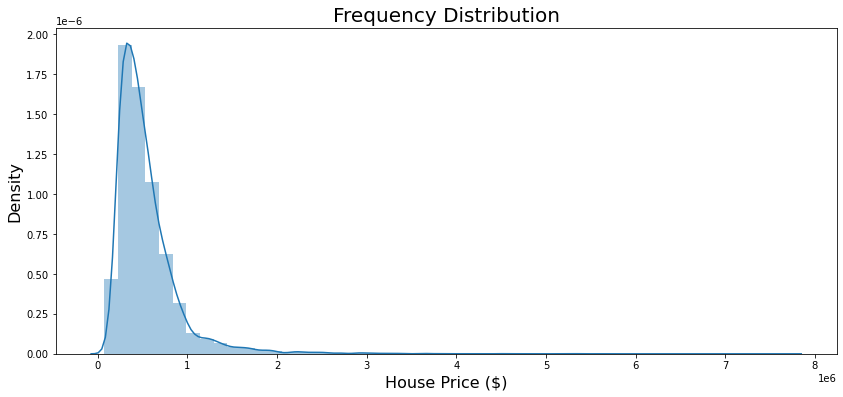

In [ ]:
#Plotting the Price Frequency Distribution 
ax = sns.distplot(df['price'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_xlabel('House Price ($)', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax

In [ ]:
# Mean, Media,Mode of House Price
print(f'Houses price Mean: $ {df.price.mean()}')
print(f'Houses price Median: $ {df.price.median()}')
print(f'Houses price Mode: $ {df.price.mode()[0]}')
print(f'Houses price Mode: $ {df.price.mode()[1]}')

Houses price Mean: $ 540088.1417665294
Houses price Median: $ 450000.0
Houses price Mode: $ 350000.0
Houses price Mode: $ 450000.0


As expected, the houses price distribution has a positive skew (mode < median < mean)

In [ ]:
#sns.pairplot()

#### Normal test for House Price

**H<sub>0</sub>: The house price variable comes from a normal distribution**

**H<sub>1</sub>: The house price variable doesn't come from a normal distribution**

In [ ]:
#Applying the normaltest on house price
from scipy.stats import normaltest
normaltest(df['price'])

NormaltestResult(statistic=19121.788941861127, pvalue=0.0)

Adopting a significance level of 5%, we reject the null hypothesis. Therefore, the house price variable doesn't come from a normal distribution.

To be honest, we didn't need to do this test, because just looking in the frequency distribution we could implying that this variable doesn't come from a normal distribution.

Maybe, a log transformation on the data could aproximate the house price distribution into a normal distribution.

### Bivariate Analysis

**Our first hypothesis is: The seasons have influence on price**

First, it will be plotted graphs to see if there exists some noticeable difference in house price variable for differents seasons

We can appeal to statistical hypothesis tests in case of graphs were not good enough to see the differences

In [ ]:
#Looking some statistics metrics of the houses price by season
df.groupby('season')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
autumn,5015.0,529161.321635,371843.927481,82000.0,314000.0,437718.0,630000.0,7700000.0
spring,6885.0,558081.050399,376492.192365,78000.0,334000.0,470000.0,660000.0,7062500.0
summer,6048.0,540114.834821,362624.901029,85000.0,325000.0,450000.0,650000.0,6885000.0
winter,3665.0,521194.659482,348328.107382,75000.0,310000.0,435000.0,615000.0,3567000.0


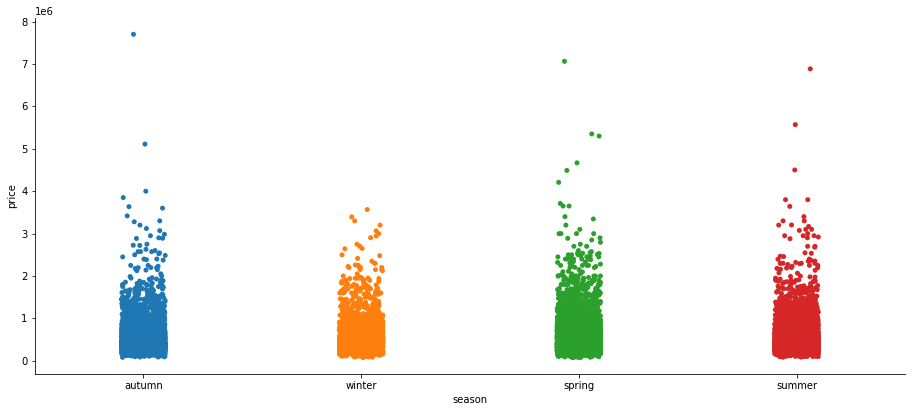

In [ ]:
#Plotting the dispersion of price in each season
ax = sns.catplot(data=df,x='season',y='price')
ax.figure.set_size_inches(14,6)

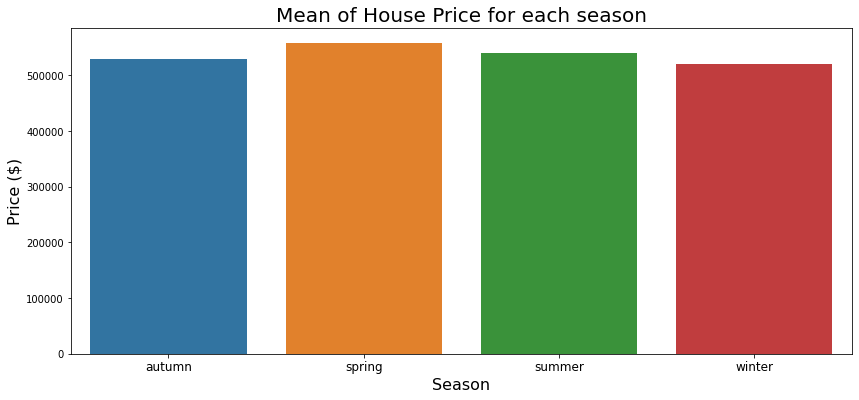

In [ ]:
#Plotting one barplot of the house price mean for each season
ax = sns.barplot(x = df.groupby('season')['price'].mean().index,y = df.groupby('season')['price'].mean().values)
ax.figure.set_size_inches(14,6)
ax.set_title('Mean of House Price for each season',fontsize=20)
ax.set_ylabel('Price ($)',fontsize = 16)
ax.set_xlabel('Season',fontsize = 16)
ax.tick_params(axis='x', labelsize=12)

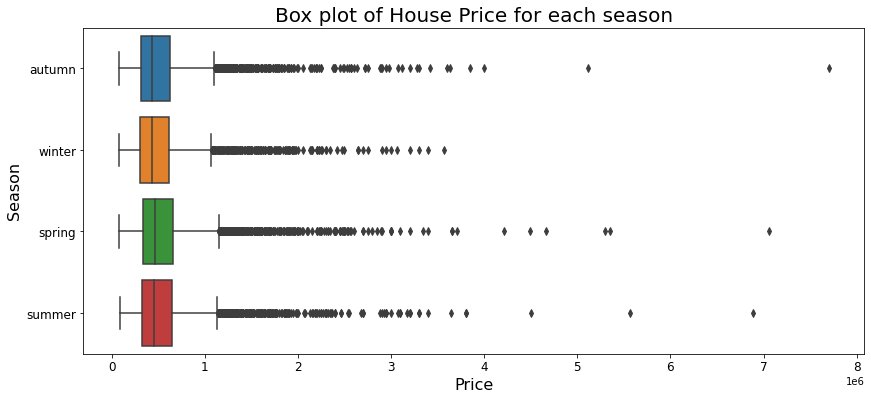

In [ ]:
#Plotting the boxplot of house price for each season
ax = sns.boxplot(data=df,y='season',x='price')
ax.figure.set_size_inches(14,6)
ax.set_title('Box plot of House Price for each season',fontsize=20)
ax.set_xlabel('Price',fontsize = 16)
ax.set_ylabel('Season',fontsize = 16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

As you can see, it doesn't have so big difference in houses prices by season. We could do a statistical test to see if, at least, the house price mean is different among the seasons. 

We would use [ANOVA](https://www.scribbr.com/statistics/one-way-anova/), however the house price doesn't follow a normal distribution. Therefore, we need to use a non-parametric test: [Kruskal-Wallis H-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html). 

Kruskal-Wallis H-test is a non-parametric version of ANOVA. The difference is instead of use mean, it uses median, but the null and alternative hypothesis are almost the same.

**H<sub>0</sub>: The median of autumn,winter,spring and summer houses price is equal**

**H<sub>1</sub>: The median of autumn,winter,spring and summer houses price is not equal**

In [ ]:
# Running Kruskal-Wallis H-test
from scipy.stats import kruskal
kruskal(df.query("season == 'autumn'").price,df.query("season == 'winter'").price,df.query("season == 'spring'").price,df.query("season == 'summer'").price)

KruskalResult(statistic=71.04991021678569, pvalue=2.543421115119312e-15)

With a significance of 5%, we reject the null hypothesis. Therefore, the medians are no equal

Although there is a difference in the median, I don't think the difference is big enough to clearly impact on price, as you can see in the boxplot. So, I will not keep the season variable.

In [ ]:
# Dropping the season variable
df.drop(['season'],axis=1,inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Now, we will plot graphs to see the correlation and the influence that others variables have on price

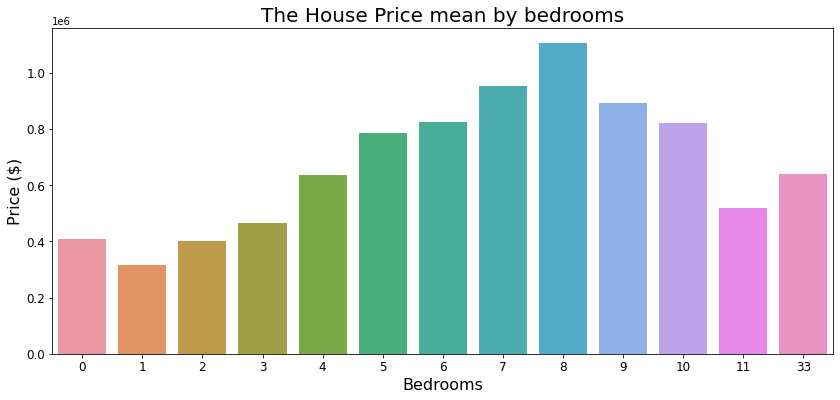

In [ ]:
#Plotting one barplot of the house price by bedrooms
ax = sns.barplot(x =df.groupby('bedrooms')['price'].mean().index, y = df.groupby('bedrooms')['price'].mean().values)
ax.figure.set_size_inches(14,6)
ax.set_title('The House Price mean by bedrooms',fontsize=20)
ax.set_xlabel('Bedrooms',fontsize = 16)
ax.set_ylabel('Price ($)',fontsize = 16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

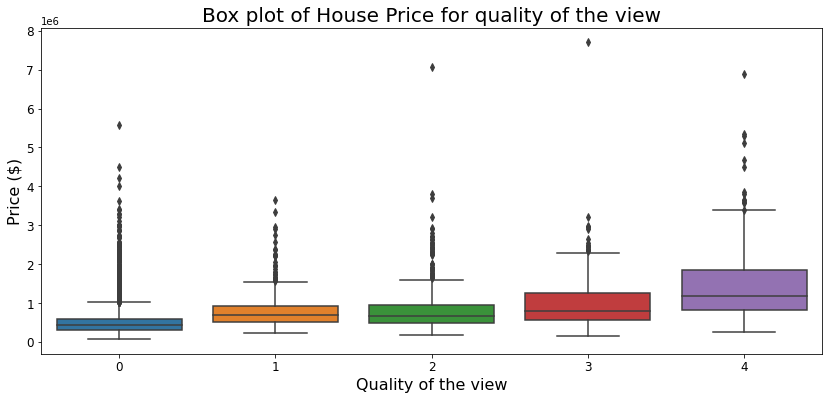

In [ ]:
#Plotting the boxplot of house price for quality of the view
ax = sns.boxplot(data=df,x='view',y='price')
ax.figure.set_size_inches(14,6)
ax.set_title('Box plot of House Price for quality of the view',fontsize=20)
ax.set_xlabel('Quality of the view',fontsize = 16)
ax.set_ylabel('Price ($)',fontsize = 16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

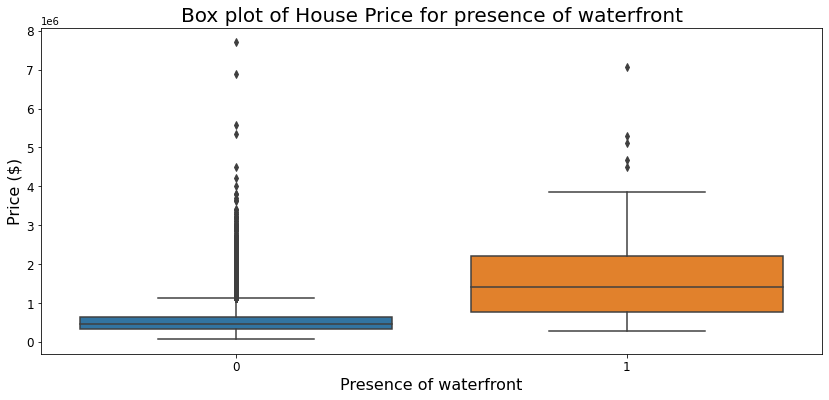

In [ ]:
#Plotting the boxplot of house price for presence of waterfront
ax = sns.boxplot(data=df,x='waterfront',y='price')
ax.figure.set_size_inches(14,6)
ax.set_title('Box plot of House Price for presence of waterfront',fontsize=20)
ax.set_xlabel('Presence of waterfront',fontsize = 16)
ax.set_ylabel('Price ($)',fontsize = 16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

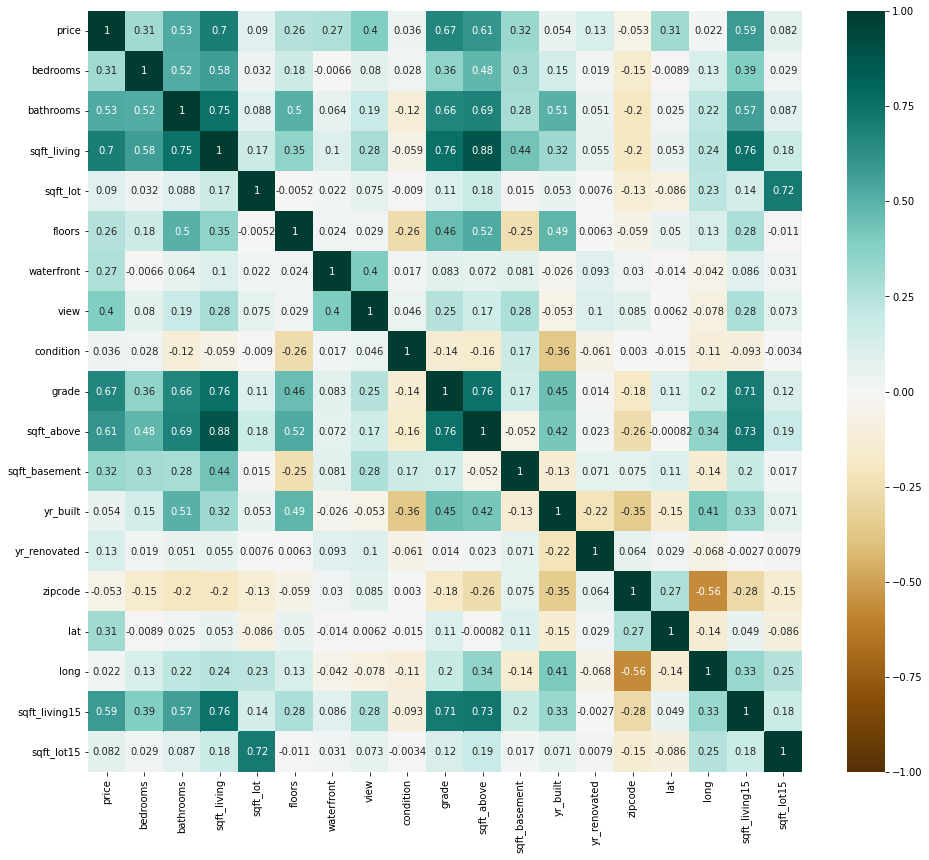

In [ ]:
#Plotting the Pearson correlation among all variables
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')

Through this heatmap correlation, we see there are many candidates to be the independent variables of our Multiple Linear Regression with high correlation among themselves. Likely, we will have to deal with a multicollinearity, which will make more difficult to know the real impact of our independent variables on price.

In [ ]:
#Pearson correlation between price and other variables
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

We can see the Pearson correlation with price among all variables. Will these five variable that show higher Pearson correlation with price (bathrooms, sqft_living15, sqft_above, grade, sqft_living) have more impact on price in our Multiple Linear Regression? We will answer this question later.


The Pearson correlation is defined as

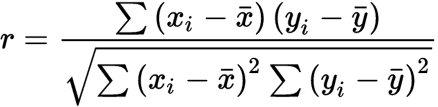

The formula returns a value between -1 and 1. 

If the returned value was between -1 and 0, the correlation among the two variables is negative, i.e., if the value of one increase that value of other decrease,and vice-versa.

In another hand, if the returned value was between 0 and 1, the correlation is positve, i.e, the both variables increase or decrease together.

We can see that correlation through the following scatter plots.

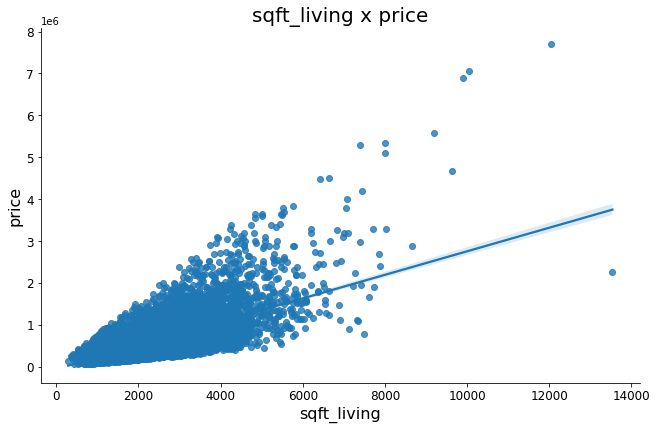

In [ ]:
#Plotting the scatter plot sqft_living x price
ax = sns.lmplot(x='sqft_living',y='price',data=df)
ax.figure.set_size_inches(10,6)
ax.ax.set_ylabel('price',fontsize = 16)
ax.ax.set_xlabel('sqft_living',fontsize=16)
ax.ax.set_title('sqft_living x price',fontsize=20)
ax.ax.tick_params(axis='x', labelsize=12)
ax.ax.tick_params(axis='y', labelsize=12)

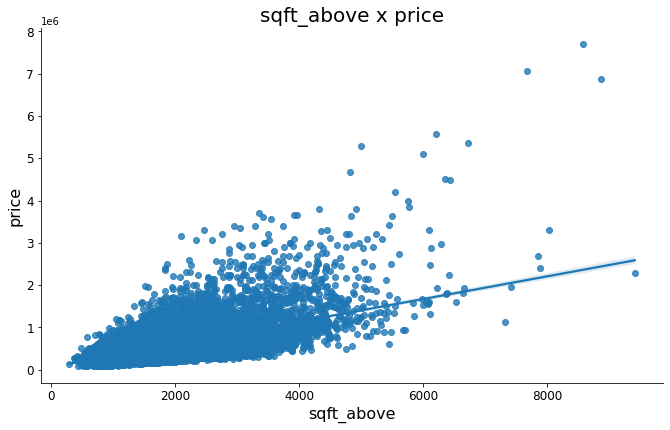

In [ ]:
#Plotting the scatter plot sqft_above x price
ax = sns.lmplot(x='sqft_above',y='price',data=df)
ax.figure.set_size_inches(10,6)
ax.ax.set_ylabel('price',fontsize = 16)
ax.ax.set_xlabel('sqft_above',fontsize=16)
ax.ax.set_title('sqft_above x price',fontsize=20)
ax.ax.tick_params(axis='x', labelsize=12)
ax.ax.tick_params(axis='y', labelsize=12)

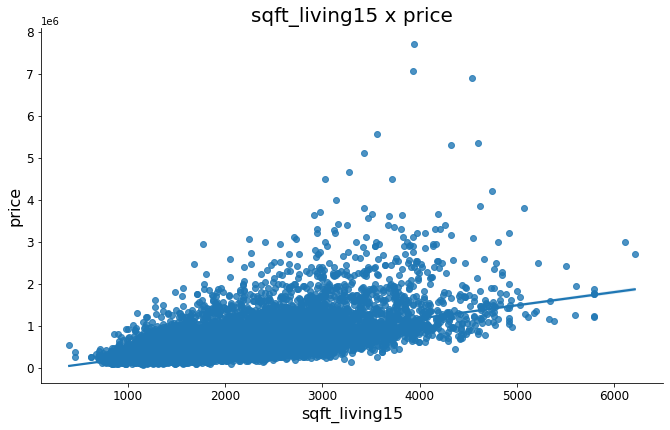

In [ ]:
#Plotting the scatter plot sqft_living15 x price
ax = sns.lmplot(x='sqft_living15',y='price',data=df)
ax.figure.set_size_inches(10,6)
ax.ax.set_ylabel('price',fontsize = 16)
ax.ax.set_xlabel('sqft_living15',fontsize=16)
ax.ax.set_title('sqft_living15 x price',fontsize=20)
ax.ax.tick_params(axis='x', labelsize=12)
ax.ax.tick_params(axis='y', labelsize=12)

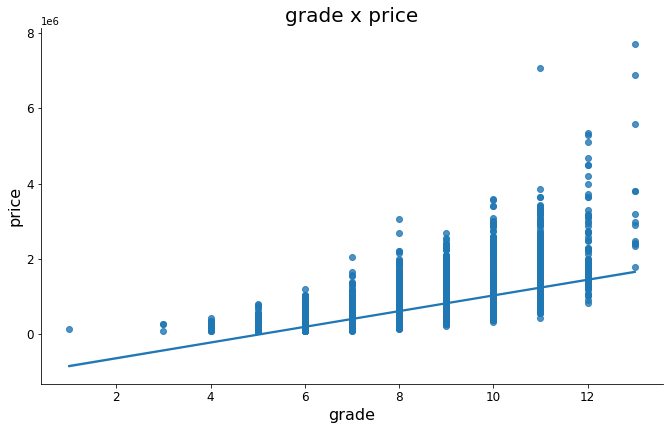

In [ ]:
#Plotting the scatter plot grade x price
ax = sns.lmplot(x='grade',y='price',data=df)
ax.figure.set_size_inches(10,6)
ax.ax.set_ylabel('price',fontsize = 16)
ax.ax.set_xlabel('grade',fontsize=16)
ax.ax.set_title('grade x price',fontsize=20)
ax.ax.tick_params(axis='x', labelsize=12)
ax.ax.tick_params(axis='y', labelsize=12)

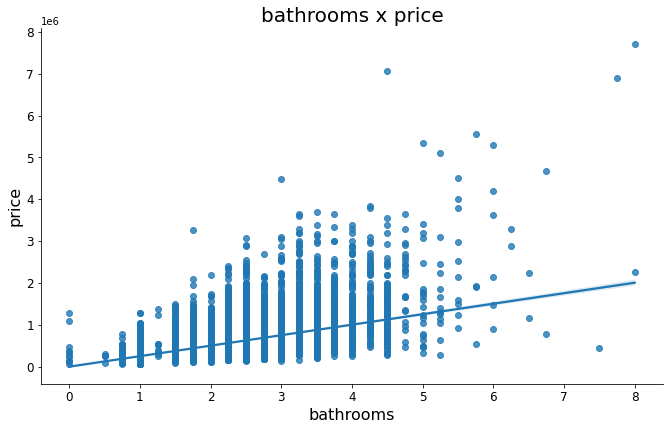

In [ ]:
#Plotting the scatter plot bathrooms x price
ax = sns.lmplot(x='bathrooms',y='price',data=df)
ax.figure.set_size_inches(10,6)
ax.ax.set_ylabel('price',fontsize = 16)
ax.ax.set_xlabel('bathrooms',fontsize=16)
ax.ax.set_title('bathrooms x price',fontsize=20)
ax.ax.tick_params(axis='x', labelsize=12)
ax.ax.tick_params(axis='y', labelsize=12)

### Applying the log transformation on data

Due the positive skew and non-normality of price, we will make our Multiple Linear Regression upon log transformed data

In [ ]:
#Looking the minimum of all columns
df.describe().loc['min']

price            75000.0000
bedrooms             0.0000
bathrooms            0.0000
sqft_living        290.0000
sqft_lot           520.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            1.0000
grade                1.0000
sqft_above         290.0000
sqft_basement        0.0000
yr_built          1900.0000
yr_renovated         0.0000
zipcode          98001.0000
lat                 47.1559
long              -122.5190
sqft_living15      399.0000
sqft_lot15         651.0000
Name: min, dtype: float64

In [ ]:
#Transforming the data through a log function 
#df = df.drop(['date'],axis=1)
from scipy import stats
df_log = pd.DataFrame()
for column in df:
  if df[column].min() < 0:
    df_log[f'log_{column}'] = np.log(df[column].abs())
  elif df[column].min() == 0:
    df_log[f'log_{column}'] = np.log(df[column]+1)
  else:
    df_log[f'log_{column}'] = np.log(df[column])
df_log

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_floors,log_waterfront,log_view,log_condition,log_grade,log_sqft_above,log_sqft_basement,log_yr_built,log_yr_renovated,log_zipcode,log_lat,log_long,log_sqft_living15,log_sqft_lot15
0,12.309982,1.386294,0.693147,7.073270,8.639411,0.000000,0.0,0.0,1.098612,1.945910,7.073270,0.000000,7.578145,0.000000,11.494537,3.860965,4.806125,7.200425,8.639411
1,13.195614,1.386294,1.178655,7.851661,8.887653,0.693147,0.0,0.0,1.098612,1.945910,7.682482,5.993961,7.576097,7.596894,11.493997,3.865372,4.806632,7.432484,8.941022
2,12.100712,1.098612,0.693147,6.646391,9.210340,0.000000,0.0,0.0,1.098612,1.791759,6.646391,0.000000,7.566828,0.000000,11.493008,3.865726,4.805929,7.908387,8.994917
3,13.311329,1.609438,1.386294,7.580700,8.517193,0.000000,0.0,0.0,1.609438,1.945910,6.956545,6.814543,7.583248,0.000000,11.494110,3.861168,4.807237,7.215240,8.517193
4,13.142166,1.386294,1.098612,7.426549,8.997147,0.000000,0.0,0.0,1.098612,2.079442,7.426549,0.000000,7.594381,0.000000,11.493478,3.863186,4.804390,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,1.386294,1.252763,7.333023,7.030857,1.098612,0.0,0.0,1.098612,2.079442,7.333023,0.000000,7.605392,0.000000,11.493773,3.864917,4.806853,7.333023,7.319202
21609,12.899220,1.609438,1.252763,7.745003,8.667852,0.693147,0.0,0.0,1.098612,2.079442,7.745003,0.000000,7.607878,0.000000,11.494211,3.860955,4.806984,7.512071,8.881836
21610,12.904459,1.098612,0.559616,6.927558,7.207860,0.693147,0.0,0.0,1.098612,1.945910,6.927558,0.000000,7.605392,0.000000,11.494191,3.862715,4.806469,6.927558,7.604396
21611,12.899220,1.386294,1.252763,7.377759,7.778211,0.693147,0.0,0.0,1.098612,2.079442,7.377759,0.000000,7.602900,0.000000,11.492998,3.861456,4.804586,7.251345,7.160069


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


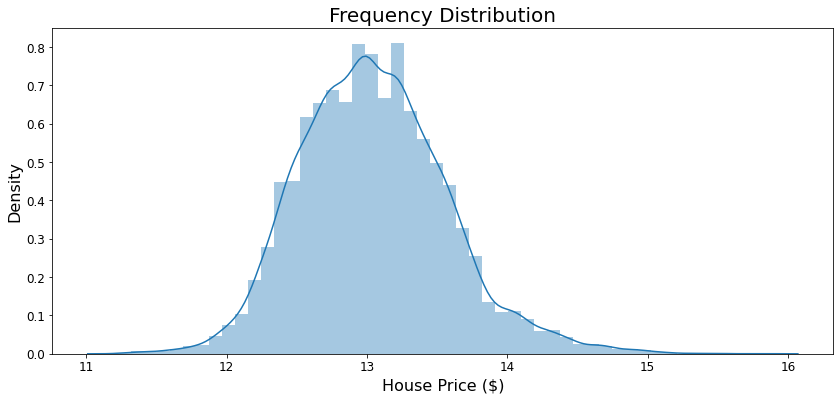

In [ ]:
#Plotting the Log Price Frequency Distribution 
ax = sns.distplot(df_log['log_price'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_xlabel('House Price ($)', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax

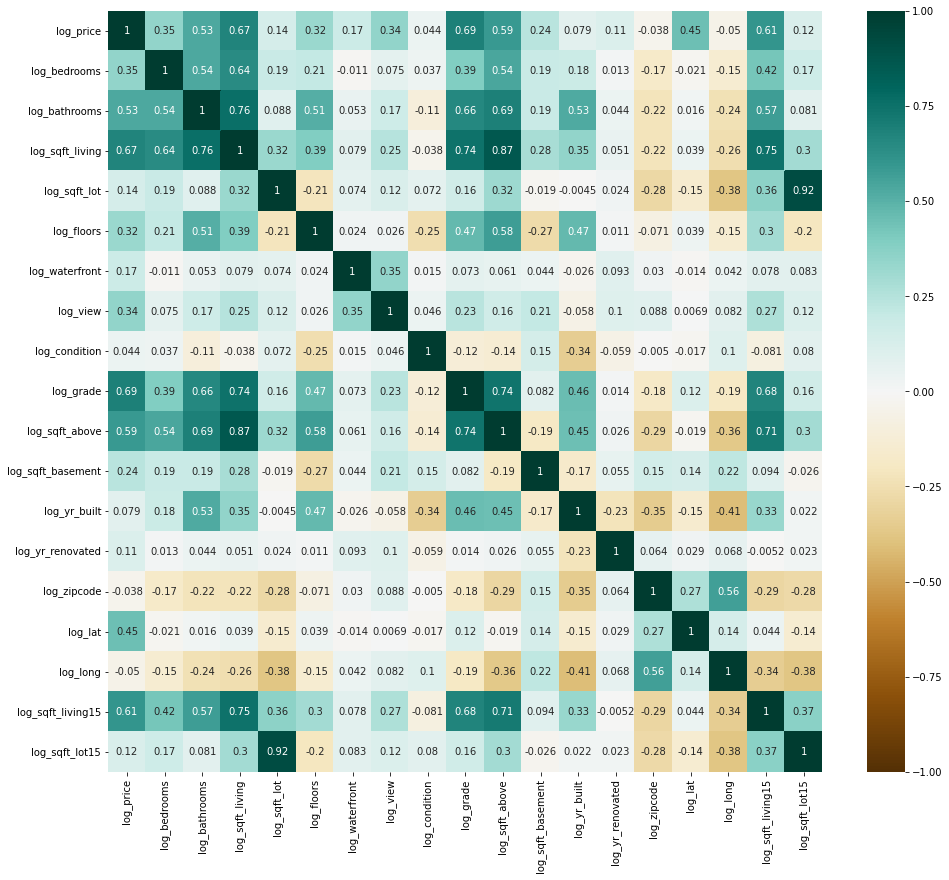

In [ ]:
#Plotting the Pearson correlation among all log transformed variables
plt.figure(figsize=(16, 14))
sns.heatmap(df_log.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')

## Making our Multiple Linear Regression

Now is time to build the Multiple Linear Regression. We will train the model and see its properties and metrics, like R² score.

For the record, the variable x is the independent variables and y is the dependent variable

image.png

As indepedent variable we will adopt all variable, execept log_price, log_long and log_zipcode

In [ ]:
#Bulding the model and showing its metrics and statistics properties
import statsmodels.api as sm
X = df_log.drop(['log_price','log_zipcode','log_long'],axis=1)
X = sm.add_constant(X)
y=df_log['log_price']
model = sm.OLS(y,X,hasconst=True).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     4411.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:55   Log-Likelihood:                -1127.8
No. Observations:               21613   AIC:                             2290.
Df Residuals:                   21596   BIC:                             2425.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -187.1932      3.024    -61.907      0.000    -193.120    -181.266
log_bedrooms         -0.1432      0.011    -12.932      0.000      -0.165      -0.122
log_bathrooms         0.1721      0.013     13.418      0.000       0.147       0.197
log_sqft_living       0.1273      0.021      5.945      0.000       0.085       0.169
log_sqft_lot          0.0215      0.005      4.254      0.000       0.012       0.031
log_floors            0.0693      0.008      9.001      0.000       0.054       0.084
log_waterfront        0.6453      0.031     20.813      0.000       0.585       0.706
log_view              0.1388      0.005     25.301      0.000       0.128       0.150
log_condition         0.2190      0.011     20.711      0.000       0.198       0.240
log_grade             1.2072      0.020     59.639      0.000       1.167       1.247
log_sqft_above        0.2437      0.021     11.660      0.000       0.203       0.285
log_sqft_basement     0.0155      0.001     11.031      0.000       0.013       0.018
log_yr_built         -7.0245      0.171    -41.147      0.000      -7.359      -6.690
log_yr_renovated      0.0084      0.001      6.888      0.000       0.006       0.011
log_lat              63.7981      0.636    100.330      0.000      62.552      65.045
log_sqft_living15     0.2369      0.009     26.912      0.000       0.220       0.254
log_sqft_lot15       -0.0419      0.006     -7.606      0.000      -0.053      -0.031
==============================================================================
Omnibus:                      857.984   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.906
Skew:                           0.243   Prob(JB):                         0.00
Kurtosis:                       4.393   Cond. No.                     3.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R² score is the proportion of the variation in the dependent variable that is predictable from the independent variable.

R² is defined as

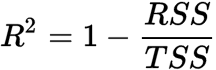

image.png = 	sum of squares of residuals

image.png = 	total sum of squares

The R-squared is R² score. In the summary above, we saw a R-squared of 0.766. For learning purposes, it is a good R² score. 

The problem is the condition number that is very large. This condition number proves our hypothesis of multicollinearity on the model. Because of that, variables that have a high correlation with price, but they also have a high correlation with others indepedent variables, they have their influence on log_price diminished on the Multiple Linear Regression.

The most important variable on our model is log_lat. This variable is not top-5 with higher correlation with price. However, this variable has low correlation with the others indepedent variables. Therefore, log_lat is little affected for the multicollinearity

In [ ]:
#Defining a new column in the original dataset: log_predicted_price
df_log['log_predicted_price'] = model.predict() 
df_log

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_floors,log_waterfront,log_view,log_condition,log_grade,...,log_sqft_basement,log_yr_built,log_yr_renovated,log_zipcode,log_lat,log_long,log_sqft_living15,log_sqft_lot15,log_error,log_predicted_price
0,12.309982,1.386294,0.693147,7.073270,8.639411,0.000000,0.0,0.0,1.098612,1.945910,...,0.000000,7.578145,0.000000,11.494537,3.860965,4.806125,7.200425,8.639411,-0.250586,12.560568
1,13.195614,1.386294,1.178655,7.851661,8.887653,0.693147,0.0,0.0,1.098612,1.945910,...,5.993961,7.576097,7.596894,11.493997,3.865372,4.806632,7.432484,8.941022,-0.243530,13.439144
2,12.100712,1.098612,0.693147,6.646391,9.210340,0.000000,0.0,0.0,1.098612,1.791759,...,0.000000,7.566828,0.000000,11.493008,3.865726,4.805929,7.908387,8.994917,-0.704936,12.805648
3,13.311329,1.609438,1.386294,7.580700,8.517193,0.000000,0.0,0.0,1.609438,1.945910,...,6.814543,7.583248,0.000000,11.494110,3.861168,4.807237,7.215240,8.517193,0.427076,12.884253
4,13.142166,1.386294,1.098612,7.426549,8.997147,0.000000,0.0,0.0,1.098612,2.079442,...,0.000000,7.594381,0.000000,11.493478,3.863186,4.804390,7.495542,8.923058,0.126247,13.015919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,1.386294,1.252763,7.333023,7.030857,1.098612,0.0,0.0,1.098612,2.079442,...,0.000000,7.605392,0.000000,11.493773,3.864917,4.806853,7.333023,7.319202,-0.309543,13.103403
21609,12.899220,1.609438,1.252763,7.745003,8.667852,0.693147,0.0,0.0,1.098612,2.079442,...,0.000000,7.607878,0.000000,11.494211,3.860955,4.806984,7.512071,8.881836,-0.038896,12.938116
21610,12.904459,1.098612,0.559616,6.927558,7.207860,0.693147,0.0,0.0,1.098612,1.945910,...,0.000000,7.605392,0.000000,11.494191,3.862715,4.806469,6.927558,7.604396,0.463510,12.440948
21611,12.899220,1.386294,1.252763,7.377759,7.778211,0.693147,0.0,0.0,1.098612,2.079442,...,0.000000,7.602900,0.000000,11.492998,3.861456,4.804586,7.251345,7.160069,0.007258,12.891962


In [ ]:
#Defining a new column in the original dataset: log_error
df_log['log_error'] = df_log['log_price'] - model.predict()
df_log

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_floors,log_waterfront,log_view,log_condition,log_grade,log_sqft_above,log_sqft_basement,log_yr_built,log_yr_renovated,log_zipcode,log_lat,log_long,log_sqft_living15,log_sqft_lot15,log_error
0,12.309982,1.386294,0.693147,7.073270,8.639411,0.000000,0.0,0.0,1.098612,1.945910,7.073270,0.000000,7.578145,0.000000,11.494537,3.860965,4.806125,7.200425,8.639411,-0.250586
1,13.195614,1.386294,1.178655,7.851661,8.887653,0.693147,0.0,0.0,1.098612,1.945910,7.682482,5.993961,7.576097,7.596894,11.493997,3.865372,4.806632,7.432484,8.941022,-0.243530
2,12.100712,1.098612,0.693147,6.646391,9.210340,0.000000,0.0,0.0,1.098612,1.791759,6.646391,0.000000,7.566828,0.000000,11.493008,3.865726,4.805929,7.908387,8.994917,-0.704936
3,13.311329,1.609438,1.386294,7.580700,8.517193,0.000000,0.0,0.0,1.609438,1.945910,6.956545,6.814543,7.583248,0.000000,11.494110,3.861168,4.807237,7.215240,8.517193,0.427076
4,13.142166,1.386294,1.098612,7.426549,8.997147,0.000000,0.0,0.0,1.098612,2.079442,7.426549,0.000000,7.594381,0.000000,11.493478,3.863186,4.804390,7.495542,8.923058,0.126247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,1.386294,1.252763,7.333023,7.030857,1.098612,0.0,0.0,1.098612,2.079442,7.333023,0.000000,7.605392,0.000000,11.493773,3.864917,4.806853,7.333023,7.319202,-0.309543
21609,12.899220,1.609438,1.252763,7.745003,8.667852,0.693147,0.0,0.0,1.098612,2.079442,7.745003,0.000000,7.607878,0.000000,11.494211,3.860955,4.806984,7.512071,8.881836,-0.038896
21610,12.904459,1.098612,0.559616,6.927558,7.207860,0.693147,0.0,0.0,1.098612,1.945910,6.927558,0.000000,7.605392,0.000000,11.494191,3.862715,4.806469,6.927558,7.604396,0.463510
21611,12.899220,1.386294,1.252763,7.377759,7.778211,0.693147,0.0,0.0,1.098612,2.079442,7.377759,0.000000,7.602900,0.000000,11.492998,3.861456,4.804586,7.251345,7.160069,0.007258


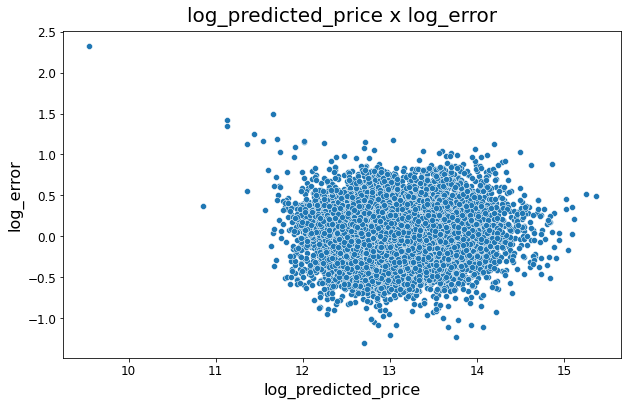

In [ ]:
#Scatter plot to see the log_error against log_predicted_price
ax = sns.scatterplot(x=df_log['log_predicted_price'],y=df_log['log_error'])
ax.figure.set_size_inches(10,6)
ax.set_title('log_predicted_price x log_error',fontsize = 20,pad = 10)
ax.set_xlabel('log_predicted_price', fontsize=16)
ax.set_ylabel('log_error', fontsize=16)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


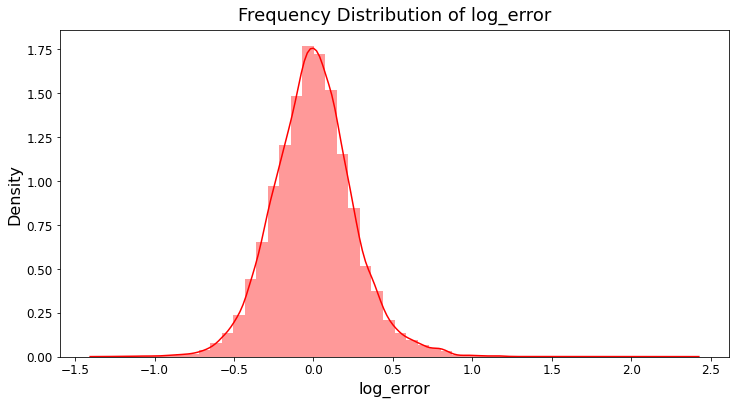

In [ ]:
#Plotting the Frequency Distribution of log_error
ax = sns.distplot(df_log['log_error'],color='red')
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribution of log_error',fontsize = 18,pad=10)
ax.set_xlabel('log_error', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax

The log_error doesn't seem to violate the homoscedasticity. But the log_error doesn't follow the normal distriubution, because its frequency distribution skew still a little positve even with the transformation.  This shows to us that our Multiple Linear Regression doesn't explain well all the trends of the depedent variable.

## Getting the undervalued houses

Our Multiple Linear Regression has some problematic issues, as you saw before. However, I still want to determine the undervalued houses. We will consider the houses that the difference between its predicted price and real price is greater than the RMSE (Root Mean Square Error) as undervalued.

Adopting this approach it will let many houses that could be considered as undervalued aside. But, our main goal here is just make sure that the houses considered as undervalued were really sold below the "market price". And if the price of these houses remain the same, these houses are a big opportunity to gain a good profit doing arbitrage.

In [ ]:
#Creating a column that represents a difference between predicted price and real price
df['residuals'] = np.exp(df_log['log_predicted_price']) - df['price']
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,residuals
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,63192.356079
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,148350.787518
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,184269.138413
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,-209941.980051
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,-60487.548377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,130608.979414
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,15864.931639
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,-149150.703092
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,-2892.778416


In [ ]:
# Calculating the RMSE
rmse = np.sqrt(((df['residuals']**2).sum())/len(df))
rmse

192019.14479446938

RMSE is also RSMD (Root Mean Square Deviation)

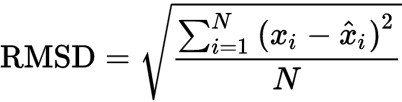

In [ ]:
#Calculating the estimated profit
df['estimated_profit'] = df['residuals']-rmse

In [ ]:
#Getting the houses with estimated profit higher than 0
undervalued_houses = df.query('estimated_profit>0')
undervalued_houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,residuals,estimated_profit
12,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,1927,0,98028,47.7558,-122.229,1780,12697,237076.852188,45057.707393
15,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,...,970,1979,0,98126,47.5714,-122.375,2140,4000,204772.396099,12753.251304
45,488000.0,3,2.50,3160,13603,2.0,0,0,3,8,...,0,2003,0,98019,47.7443,-121.977,3050,9232,291637.546780,99618.401986
65,317625.0,3,2.75,2770,3809,1.5,0,0,5,7,...,1000,1925,0,98144,47.5747,-122.304,1440,4000,303801.768881,111782.624086
70,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,...,1700,1973,0,98005,47.6525,-122.160,3530,38917,272210.196535,80191.051740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21186,303500.0,6,4.50,3390,7200,2.0,0,0,3,8,...,950,2007,0,98118,47.5205,-122.288,2040,7214,238864.726303,46845.581509
21227,623300.0,4,3.50,4170,4524,2.0,0,0,3,9,...,670,2007,0,98072,47.7726,-122.162,3510,5001,509153.030042,317133.885247
21327,535000.0,4,3.25,2840,4000,2.0,0,3,3,9,...,510,2014,0,98108,47.5529,-122.293,2160,4867,220520.291932,28501.147138
21363,410000.0,4,2.25,2510,4090,2.0,0,0,3,8,...,670,2012,0,98019,47.7345,-121.967,2070,4090,207343.043257,15323.898462


In [ ]:
#The sum of all undervalued houses price
print(f"${undervalued_houses['price'].sum()}")

$666721234.0


In [ ]:
#The sum of all undervalued houses estimated profit
print(f"${undervalued_houses['estimated_profit'].sum()}")

$98270764.35258357


If a real estate company had bought all of the undervalued houses, it could spend $666,721,234. 

And if this company had sold all of the houses for the predicted price would earn a profit of $98,270,764.35




## Conclusion

Well, this finish our little project. 

It's important to clarify that this Multiple Linear Regression and this approach to determine the undervalued houses were made just for learning purposes. There are many ways to search for houses with price below the market price and, likely, it make a Multiple Linear Regression is just a simplistic way for that.

The multicollinearity and the non-normality of the errors suggest that we should change the transformation upon our variables or adopt a new linear model. Ridge Regression, for example, is a linear model that deal very well with independent variables with high correlation among themselves.

Therefore, there are a lot of things to improve even if we consider our approach to determine the undervalued houses adequate

